# Physics of the market Lab2
ZHANG Mian\
CentraleSupélec

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import statsmodels.api as smi
import pylab

In [ ]:
from numpy import linalg as LA
import math
import networkx as nx
import community

On charge les données et on supprime les 12000 premières lignes.

In [ ]:
df_logreturns = pd.read_csv('us_equities_logreturns.csv.gz', index_col = 0)
df_logreturns

,^GSPC,GE,IBM,DIS,BA,CAT,AA,HPQ,DD,KO,...,NSM,CLP,CTX,CTR,DYN,AIB,KIM,SFN,TCO,S
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.011340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.004737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.002949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.005872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16150,0.000305,-0.005420,-0.002896,0.004063,-0.009916,-0.000207,-0.001642,-0.010756,0.006343,-0.000520,...,0.042972,NaN,0.001974,-0.001879,0.011547,0.003892,0.002334,0.011191,0.009188,0.000000
16151,-0.011770,-0.016439,-0.012537,-0.017978,-0.020624,-0.012576,-0.025803,-0.023249,-0.010898,-0.013082,...,-0.011131,NaN,0.007076,-0.006604,-0.008647,-0.001296,0.001863,0.001534,-0.000436,-0.018391
16152,-0.002826,-0.009118,-0.009232,0.001750,0.009959,-0.002304,-0.001688,0.005519,0.000913,0.005253,...,0.047769,NaN,0.007026,0.003307,0.008237,0.003020,0.001395,0.005350,-0.015368,0.018391
16153,0.009568,0.012663,0.019565,0.016351,0.018590,0.002931,0.005055,0.014005,0.009232,0.002616,...,-0.017531,NaN,0.003882,0.007987,0.002458,0.025942,0.000465,0.009860,0.000442,-0.001140


In [ ]:
df_logreturns.drop(df_logreturns.index[0:12000],0,inplace=True)
df_logreturns=df_logreturns.reset_index(drop = True)
df_logreturns

,^GSPC,GE,IBM,DIS,BA,CAT,AA,HPQ,DD,KO,...,NSM,CLP,CTX,CTR,DYN,AIB,KIM,SFN,TCO,S
0,-0.007032,-0.014556,0.010490,-0.026062,-0.022809,0.003367,-0.014736,-0.012446,-0.006903,-0.024048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.012328,0.018882,-0.002737,0.018079,0.023845,0.007257,-0.018387,0.013397,0.003043,0.016436,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.004491,0.002156,-0.015313,0.000943,-0.028630,-0.009500,0.019061,-0.026488,-0.013068,0.008623,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.027738,0.032489,0.034315,0.023739,0.015598,0.040170,0.027927,0.039239,0.003911,0.029363,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.002796,0.016541,0.000000,-0.002303,0.018969,-0.007037,-0.015197,-0.012751,0.022875,-0.003439,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4150,0.000305,-0.005420,-0.002896,0.004063,-0.009916,-0.000207,-0.001642,-0.010756,0.006343,-0.000520,...,0.042972,NaN,0.001974,-0.001879,0.011547,0.003892,0.002334,0.011191,0.009188,0.000000
4151,-0.011770,-0.016439,-0.012537,-0.017978,-0.020624,-0.012576,-0.025803,-0.023249,-0.010898,-0.013082,...,-0.011131,NaN,0.007076,-0.006604,-0.008647,-0.001296,0.001863,0.001534,-0.000436,-0.018391
4152,-0.002826,-0.009118,-0.009232,0.001750,0.009959,-0.002304,-0.001688,0.005519,0.000913,0.005253,...,0.047769,NaN,0.007026,0.003307,0.008237,0.003020,0.001395,0.005350,-0.015368,0.018391
4153,0.009568,0.012663,0.019565,0.016351,0.018590,0.002931,0.005055,0.014005,0.009232,0.002616,...,-0.017531,NaN,0.003882,0.007987,0.002458,0.025942,0.000465,0.009860,0.000442,-0.001140


On applique l’algorithme de Louvain selon la méthode de MacMahon et Garlaschelli pour obtenir les états.

In [ ]:
def compute_C_minus_C0(lambdas,v,lambda_plus,removeMarketMode=True):
    N=len(lambdas)
    C_clean=np.zeros((N, N))
    
    order = np.argsort(lambdas)
    lambdas,v = lambdas[order],v[:,order]
    
    v_m=np.matrix(v)

    # note that the eivenvalues are sorted
    for i in range(1*removeMarketMode,N):                            
        if lambdas[i]>lambda_plus: 
            C_clean=C_clean+lambdas[i] * np.dot(v_m[:,i],v_m[:,i].T)  
    return C_clean    
    
    
def LouvainCorrelationClustering(R):   # R is a matrix of return
    N=R.shape[1]
    T=R.shape[0]

    q=N*1./T
    lambda_plus=(1.+np.sqrt(q))**2

    C=R.corr()
    lambdas, v = LA.eigh(C)


            
    C_s=compute_C_minus_C0(lambdas,v,lambda_plus)
    
    mygraph= nx.from_numpy_matrix(np.abs(C_s))
    partition = community.community_louvain.best_partition(mygraph)

    DF=pd.DataFrame.from_dict(partition,orient="index")
    return(DF)


In [ ]:
T = 100 # taille de fenêtre de calibration T
N = 300 #  univers de titres
nbr_window = 4
Liste_etat_marché = []
for i in range(nbr_window):
    df_logreturnsN_T = df_logreturns.iloc[df_logreturns.index[i:T+i],df_logreturns.index[i:N+i]]
    df_logreturnsN_T = df_logreturnsN_T.dropna(axis=1) 
    Liste_etat_marché.append(LouvainCorrelationClustering(df_logreturnsN_T))
Liste_etat_marché

[     0
 0    1
 1    1
 2    1
 3    1
 4    1
 ..  ..
 290  2
 291  1
 292  2
 293  1
 294  0
 
 [295 rows x 1 columns],
      0
 0    2
 1    2
 2    2
 3    2
 4    2
 ..  ..
 290  2
 291  1
 292  1
 293  1
 294  1
 
 [295 rows x 1 columns],
      0
 0    0
 1    0
 2    0
 3    0
 4    2
 ..  ..
 290  2
 291  2
 292  2
 293  2
 294  1
 
 [295 rows x 1 columns],
      0
 0    2
 1    2
 2    2
 3    0
 4    2
 ..  ..
 290  0
 291  0
 292  0
 293  1
 294  0
 
 [295 rows x 1 columns]]

Text(0.5, 1.0, 'Nombre d’états de marché en fonction du temps pour 4 fenêtres de calibration')

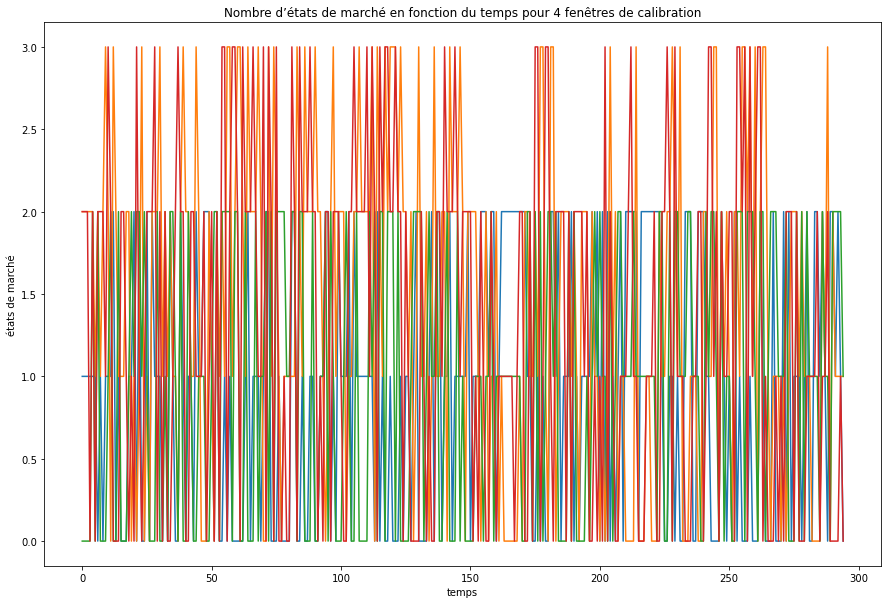

In [ ]:
plt.figure(figsize = ((15,10)))

for df in Liste_etat_marché:
    plt.plot(df)
    
plt.xlabel('temps')
plt.ylabel('états de marché')
plt.title(f"Nombre d’états de marché en fonction du temps pour {nbr_window} fenêtres de calibration")